## Import Library

In [1]:
import pandas as pd

In [2]:
import plotly
import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default = 'iframe'

# Ploting

In [3]:
df = pd.read_csv('https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv', skiprows=1)
df['Cum_Vol'] = df['Volume USDT'].cumsum()
df['Cum_Vol_Price'] = (df['Volume USDT'] * (df['high'] + df['low'] + df['close'] ) /3).cumsum()
df['VWAP'] = df['Cum_Vol_Price'] / df['Cum_Vol']

In [4]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,Cum_Vol,Cum_Vol_Price,VWAP
0,1.646352e+12,2022-03-04 00:00:00,BTC/USDT,42454.00,42527.30,42170.80,42183.48,690.64906,2.924389e+07,15327.0,2.924389e+07,1.236837e+12,42293.860000
1,1.646266e+12,2022-03-03 00:00:00,BTC/USDT,43892.99,44101.12,41832.28,42454.00,50940.61021,2.192152e+09,1289320.0,2.221396e+09,9.505174e+13,42789.192137
2,1.646179e+12,2022-03-02 00:00:00,BTC/USDT,44421.20,45400.00,43334.09,43892.98,57782.65081,2.550793e+09,1653131.0,4.772189e+09,2.078198e+14,43548.109156
3,1.646093e+12,2022-03-01 00:00:00,BTC/USDT,43160.00,44949.00,42809.98,44421.20,61743.09873,2.701611e+09,1866871.0,7.473800e+09,3.268529e+14,43733.167901
4,1.646006e+12,2022-02-28 00:00:00,BTC/USDT,37699.08,44225.84,37450.17,43160.00,73945.63858,2.975160e+09,1931087.0,1.044896e+10,4.506553e+14,43129.203072


In [7]:
df = df.sort_values('date')

In [9]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,Cum_Vol,Cum_Vol_Price,VWAP
1661,1.502928e+09,2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08,647.86,2812379.11,NaN,1.774474e+12,6.475089e+16,36490.181257
1660,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.07,4994493.56,NaN,1.774472e+12,6.475088e+16,36490.232237
1659,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.15,1508239.39,NaN,1.774467e+12,6.475086e+16,36490.323293
1658,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.54,1915636.35,NaN,1.774465e+12,6.475085e+16,36490.350859
1657,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.12,2770592.06,NaN,1.774463e+12,6.475084e+16,36490.385816


In [10]:
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1662 entries, 1661 to 0
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unix           1662 non-null   float64
 1   date           1662 non-null   object 
 2   symbol         1662 non-null   object 
 3   open           1662 non-null   float64
 4   high           1662 non-null   float64
 5   low            1662 non-null   float64
 6   close          1662 non-null   float64
 7   Volume BTC     1662 non-null   float64
 8   Volume USDT    1662 non-null   float64
 9   tradecount     1538 non-null   float64
 10  Cum_Vol        1662 non-null   float64
 11  Cum_Vol_Price  1662 non-null   float64
 12  VWAP           1662 non-null   float64
dtypes: float64(11), object(2)
memory usage: 181.8+ KB


In [12]:
# Clearing
df.date = pd.to_datetime(df['unix'],unit='ms')
df.index = df.date

#Filter >= 2018-01-01
df = df[(df['date'] >= '2018-01-01')]

df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

In [13]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.show()

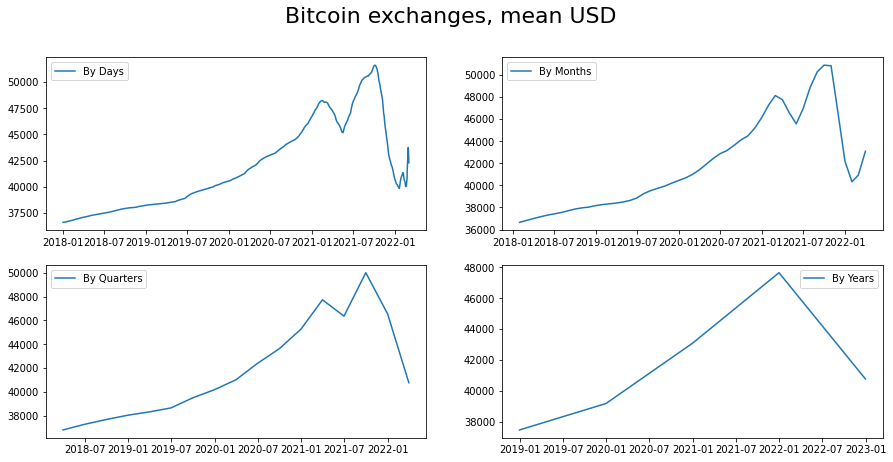

In [14]:
import matplotlib.pyplot as plt
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.VWAP, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.VWAP, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.VWAP, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.VWAP, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
price = scaler.fit_transform(np.array(df['VWAP']).reshape(-1,1))
df['price'] = price

In [16]:
df = df['price']

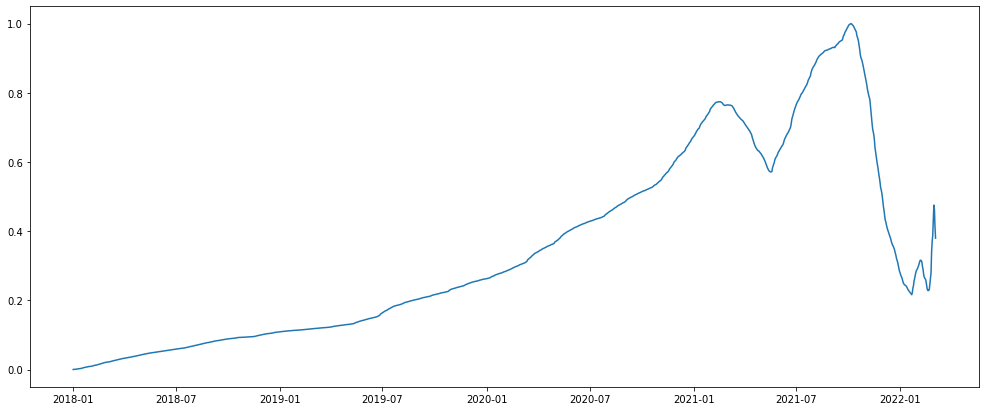

In [17]:
plt.figure(figsize=(17,7))
plt.plot(df)
plt.show()

In [18]:
X_l = []
y_l = []
N = len(df)
D = 50
for i in range(N-D-1):
    X_l.append(df.iloc[i:i+D])
    y_l.append(df.iloc[i+D])
    
X = np.array(X_l)
y = np.array(y_l)

print(X.shape, y.shape)

(1473, 50) (1473,)


In [19]:
X = X.reshape(X.shape[0],X.shape[1],1)
y = y.reshape(y.shape[0],1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 100)

In [21]:
from tensorflow.keras import models, layers

m_x = layers.Input(shape = X_train.shape[1:])
m_h = layers.LSTM(10)(m_x)
m_y = layers.Dense(1)(m_h)
m = models.Model(m_x,m_y)
m.compile('adam','mse')
m.summary()

2022-03-04 21:45:13.784462: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-03-04 21:45:17.532667: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-04 21:45:17.533920: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-04 21:45:17.574765: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 21:45:17.575418: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:05:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-03-04 21:45:17.575469: I tensorflow/stream_executor/platfor

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = m.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test),verbose=0)

2022-03-04 21:45:18.901386: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-04 21:45:18.901863: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199870000 Hz
2022-03-04 21:45:20.273929: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-03-04 21:45:20.910423: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-03-04 21:45:20.941579: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
Could not load symbol cublasGetSmCountTarget from libcublas.so.11. Error: /usr/local/cuda-11.0/targets/x86_64-linux/lib/libcublas.so.11: undefined symbol: cublasGetSmCountTarget


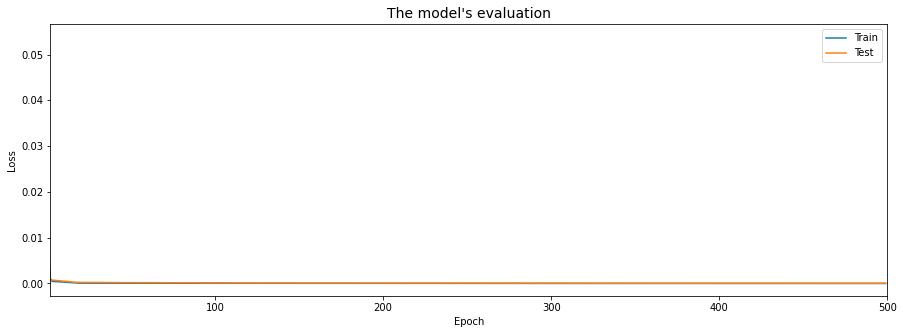

In [23]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Test'])
plt.title("The model's evaluation", fontsize=14)
plt.xlabel('Epoch')
plt.xlim(2,500)
plt.ylabel('Loss')
plt.show()

In [24]:
pred = []

pr = m.predict(np.array(df[-50:]))

pred.append(pr[0])

for i in range(1,50):
    pr = m.predict(np.concatenate((np.array(df[-50+i:]).flatten(), np.array(pred[:]).flatten()), axis=0))
    pred.append(pr[0])

for i in range(0,250):
    pr = m.predict(np.concatenate(pred[i:],axis=0).reshape(-1,1))
    pred.append(pr[0])

In [25]:
pred = pd.DataFrame(pred)

pred = pred.reset_index()

pred.columns = ['z','price']

pred.drop(['z'],axis=1,inplace=True)

In [26]:
data = pd.concat([df.reset_index().drop('date',axis=1),pred],ignore_index=True)

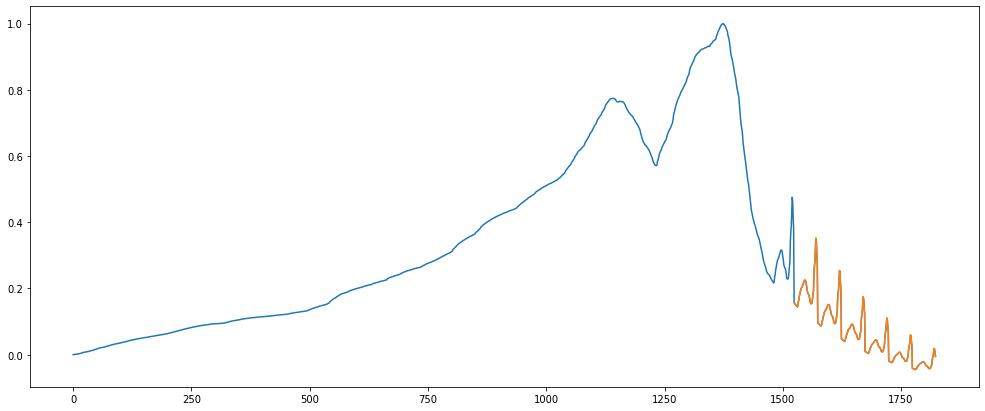

In [31]:
plt.figure(figsize=(17,7))
plt.plot(data)
plt.plot(data[-300:])
plt.show()

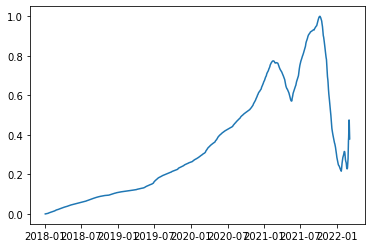

In [28]:
plt.plot(df)